In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_colwidth=1000
pd.options.display.float_format = '{:.3f}'.format

In [6]:
import os

directory_path = "./cross_entropy_h200"  # Replace with the actual path

files = None
try:
    files = os.listdir(directory_path)
    #print("Files in directory:", files)
except FileNotFoundError:
    print(f"Error: Directory '{directory_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

bench_list = [os.path.splitext(file)[0] for file in files]
#print(bench_list)

In [7]:
dfs = {name: pd.read_csv(directory_path + "/" + name + ".csv") for name in bench_list}

pivot_dfs = {}
for name,df in dfs.items():
    pivot_dfs[name] = df.pivot(index=["Model", "Batch", "Seq-Len"], columns=["Executor"], values=["Fwd-K-Time(ms)", "Fwd-K-Spdup", "Bwd-K-Time(ms)", "Bwd-K-Spdup", "K-Time(ms)", "K-Spdup", "Wall-Time(ms)", "Wall-Spdup", "Overhead(ms)"])

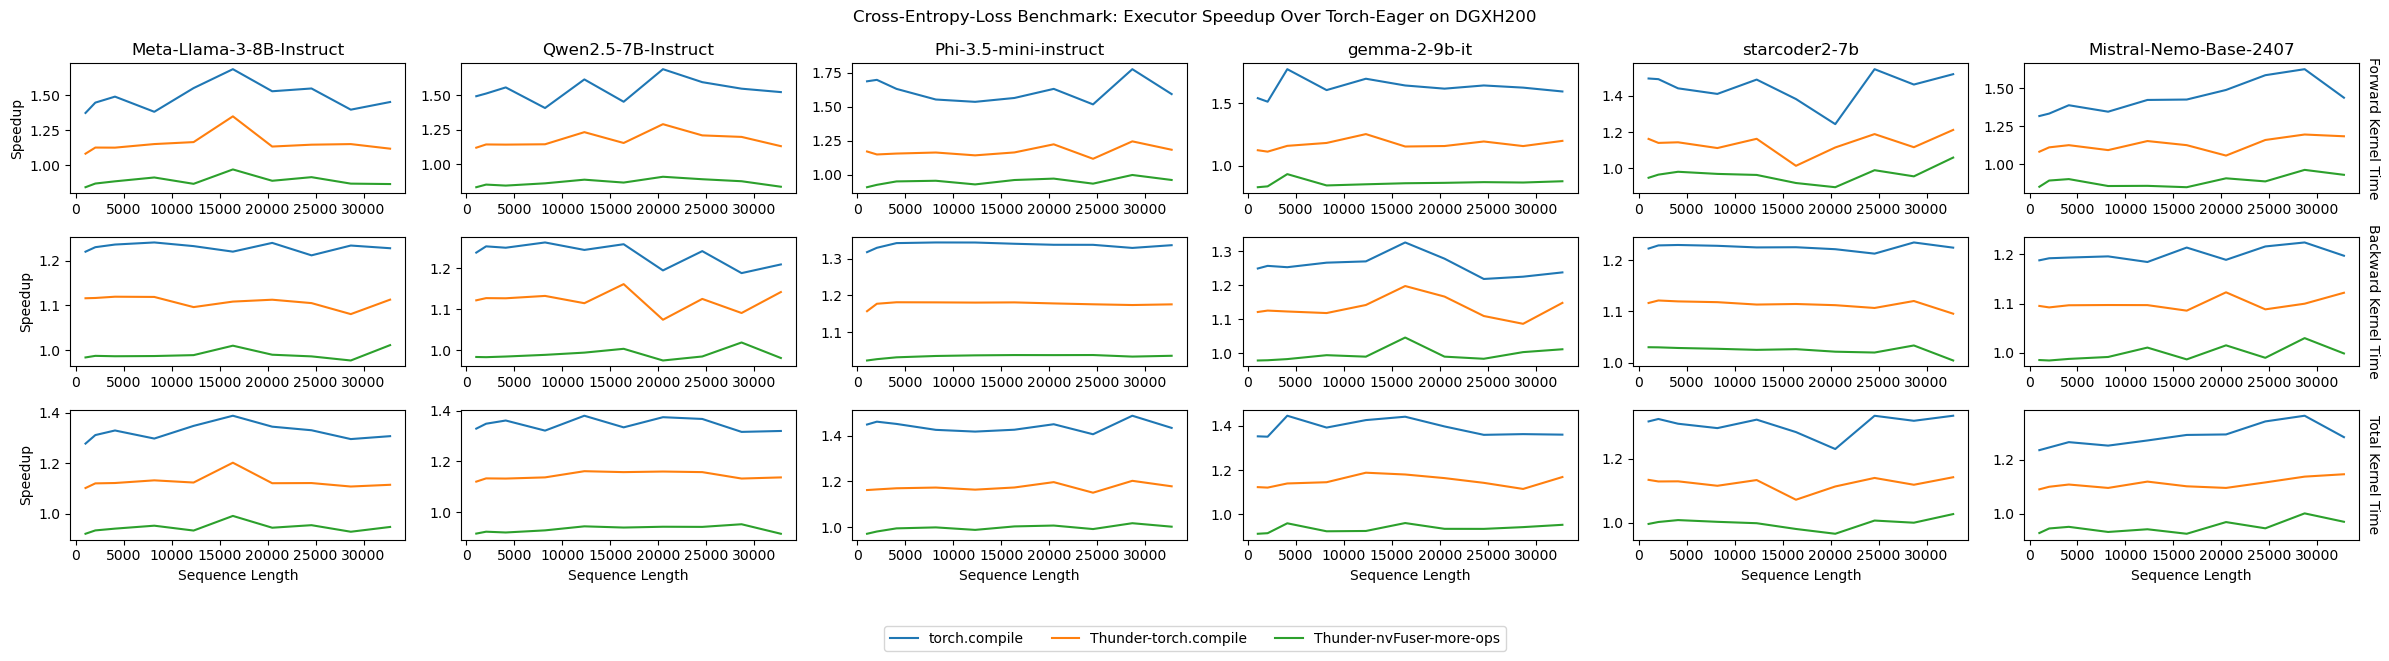

In [12]:
num_plots = len(pivot_dfs)
executor_list = ["torch.compile", "Thunder-torch.compile", "Thunder-nvFuser-more-ops"]
fig, axes = plt.subplots(nrows=3, ncols=num_plots, figsize=(4*num_plots, 6))
for idx,name in enumerate(bench_list):
    pivot_dfs[name]['Fwd-K-Spdup'].reset_index().plot(ax=axes[0,idx], x="Seq-Len", y=executor_list)
    axes[0, idx].legend().remove()
    axes[0, idx].set_title(name)
    axes[0, idx].set_xlabel("")
    if idx == 0:
        axes[0, idx].set_ylabel("Speedup")
    if idx == (num_plots - 1):
        axes[0, idx].yaxis.set_label_position("right")
        axes[0, idx].set_ylabel('Forward Kernel Time', rotation=270, labelpad=15)
    pivot_dfs[name]['Bwd-K-Spdup'].reset_index().plot(ax=axes[1,idx], x="Seq-Len", y=executor_list)
    axes[1, idx].legend().remove()
    axes[1, idx].set_xlabel("")
    if idx == 0:
        axes[1, idx].set_ylabel("Speedup")
    if idx == (num_plots - 1):
        axes[1, idx].yaxis.set_label_position("right")
        axes[1, idx].set_ylabel('Backward Kernel Time', rotation=270, labelpad=15)
    pivot_dfs[name]['K-Spdup'].reset_index().plot(ax=axes[2,idx], x="Seq-Len", y=executor_list)
    axes[2, idx].legend().remove()
    axes[2, idx].set_xlabel("Sequence Length")
    if idx == 0:
        axes[2, idx].set_ylabel("Speedup")
    if idx == (num_plots - 1):
        axes[2, idx].yaxis.set_label_position("right")
        axes[2, idx].set_ylabel('Total Kernel Time', rotation=270, labelpad=15)
fig.legend(labels=executor_list, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.1))
fig.suptitle("Cross-Entropy-Loss Benchmark: Executor Speedup Over Torch-Eager on DGXH200")
plt.tight_layout()
fig.savefig('cross_entropy_loss_executors.png', dpi=300, bbox_inches='tight')
plt.show()